# Group 36 - Glass Prediction Project Proposal

### **Introduction:**

Different elements and variations in refractive index play a critical role in the formulation and properties of various types of glass. With this information, we are able to predict which glass is most likely to form with the elements presented and the refractive index. The float glass process was invented in the 1950s in response to a pressing need for an economical method to create flat glass for automotive as well as architectural applications.  In the float glass process, the ingredients (silica, lime, soda, etc.) are first blended with cullet (recycled broken glass) and then heated in a furnace to around 1600°C to form molten glass. The molten glass is then fed onto the top of a molten tin bath.
q

**We want to answer the question of:**
To predict the type of glass of an unknown glass sample with KNN model trained with our dataset.

**Identify and describe the dataset that will be used to answer the question:**
The dataset is composed of the refractive index as well as eight different elements to represent the type of glass the combination of those elements and refractive index represent. 

### **Method**
**Explain how you will conduct either your data analysis and which variables/columns you will use:**
We will conduct our data analysis by implementing the KNN principle. KNN works on the fundamental idea that similar things are close to each other. This similarity can be measured using distance metrics using the Euclidean distance. We will be using all variables on the dataset to get a more accurate prediction to the type of glass. 

**Describe at least one way that you will visualize the results:**
At least two columns (ex. Si Level and Reflective Index) will be graphed separately and compared to the new dataset of Si Level and Reflective Index to help visualize to readers why it was classified into the classification of Glass. 



### Glass Dataset

**Type of Glass** \
1 : Building Windows (float-processed) \
2 : Building Windows (non-float-processed) \
3 : Vehicle Windows (float-processed) \
4 : Vehicle Windows (non-float-processed) *none in this dataset* \
5 : Containers \
6 : Tableware \
7 : Headlamps 

Source: German,B.. (1987). Glass Identification. UCI Machine Learning Repository. https://doi.org/10.24432/C5WW2P.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)
library("ggplot2")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
#Read in dataset
names <- c("ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
glass <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"), header=FALSE)
colnames(glass) = names
glass <- glass |> select(-ID) |> mutate(Type = as_factor(Type))
glass

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7
1.51711,14.23,0,2.08,73.36,0,8.62,1.67,0,7


**Using only training data:**
Summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [9]:
#Splitting data into testing and training data
set.seed(123)

glass_split <- initial_split(glass, prop = 0.75, strata = Type)
glass_train <- training(glass_split)
glass_test <- testing(glass_split)

In [13]:
#Summarize Data

#The mean value of each characteristic of each type of glass
print("Table of the mean of each variable")
glass_mean <- glass_train |>
    group_by(Type) |>
    summarize(across(everything(), mean))
glass_mean

print("Count of how many obervations there are for each type of glass")
#Count of how many observations there are for each type of glass
glass_type <- glass_train |> count(Type)
glass_type

[1] "Table of the mean of each variable"


Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.518640,13.16960,3.5180000,1.163800,72.73260,0.4690000,8.780600,0.00220000,0.05600000
2,1.519059,13.10035,2.9312281,1.380175,72.52754,0.4908772,9.268070,0.06508772,0.07894737
3,1.517874,13.38545,3.5009091,1.245455,72.45182,0.4136364,8.723636,0.01363636,0.07909091
5,1.518928,12.82769,0.7738462,2.033846,72.36615,1.4700000,10.123846,0.18769231,0.06076923
6,1.516480,14.88667,1.5566667,1.410000,73.31333,0.0000000,8.723333,0.00000000,0.00000000
7,1.517327,14.39957,0.6786957,2.076087,72.93348,0.4065217,8.422174,1.00739130,0.01695652


[1] "Count of how many obervations there are for each type of glass"


Type,n
<fct>,<int>
1,50
2,57
3,11
5,13
6,6
7,23


**Using only training data:**
Visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

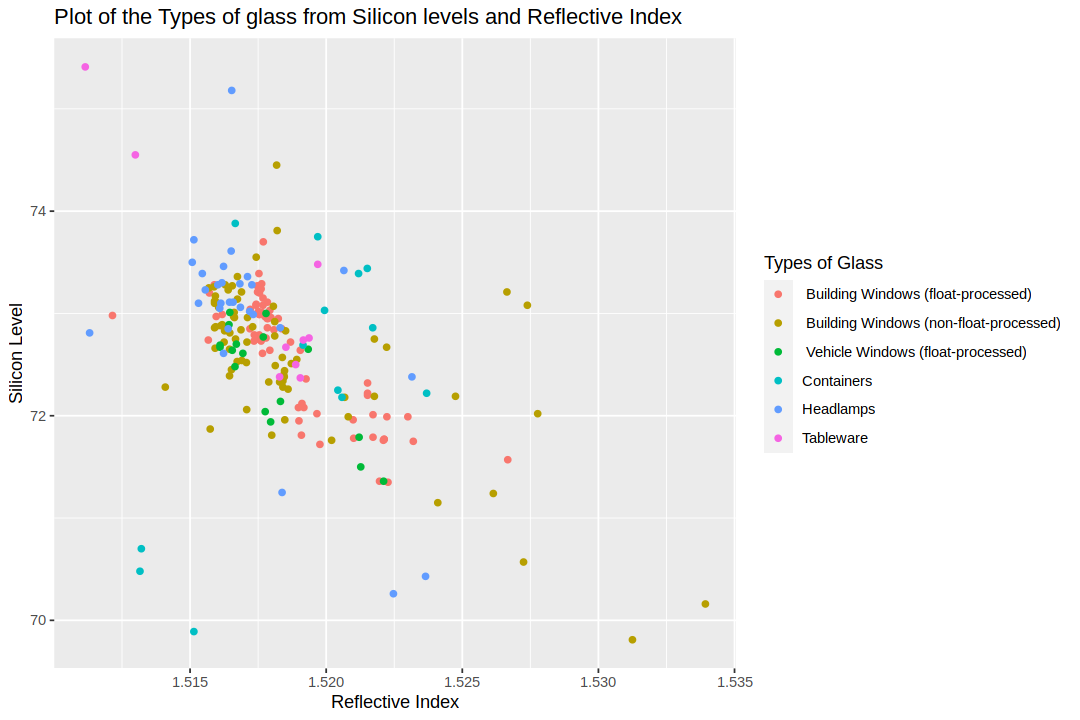

In [5]:
#Naming the Types of glass 
glass_name <- mutate(glass, Type = case_when(
    Type == 1 ~ " Building Windows (float-processed)",
    Type == 2 ~ " Building Windows (non-float-processed)",
    Type == 3 ~ " Vehicle Windows (float-processed)",
    Type == 4 ~ " Vehicle Windows (non-float-processed)",
    Type == 5 ~ "Containers",
    Type == 6 ~ "Tableware",
    Type == 7 ~ "Headlamps"))

#Plot of the Types of glass from Silicon levels and Reflective Index
options(repr.plot.width = 9, repr.plot.height = 6) 

ri_si_plot <- ggplot(glass_name, aes(x = RI, y = Si, group = Type)) +
    geom_point(aes(color = Type)) +
    labs(title = "Plot of the Types of glass from Silicon levels and Reflective Index", 
            x = "Reflective Index",
            y = "Silicon Level",
            color = "Types of Glass")

           
ri_si_plot

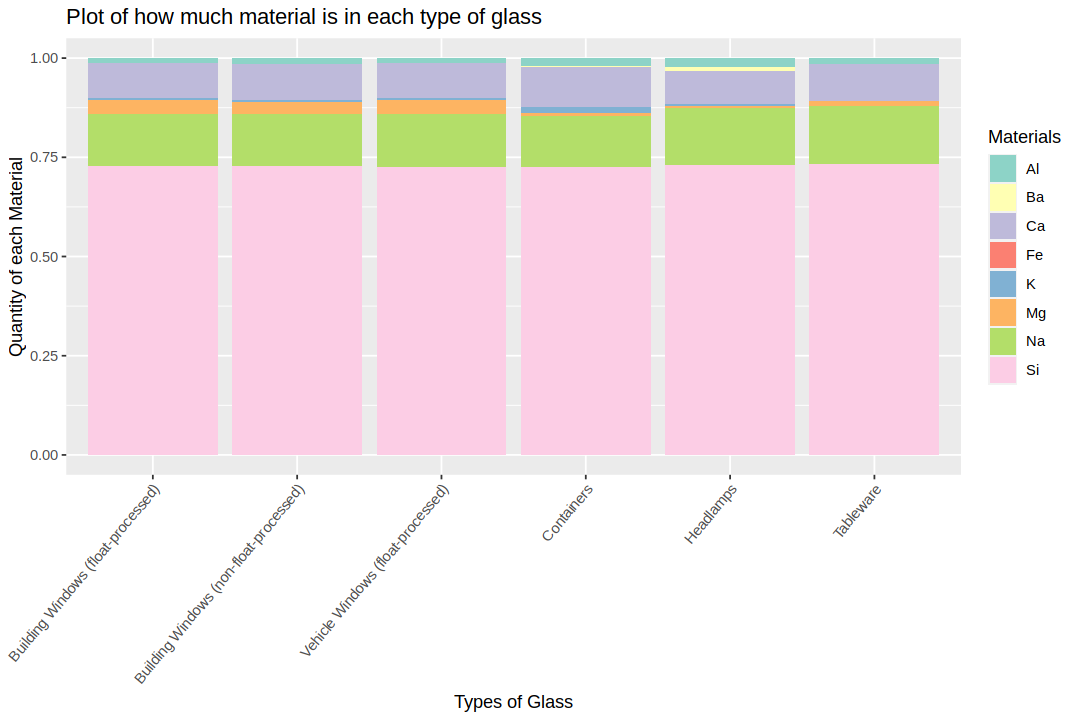

In [6]:
#Plot of how much material is in each type of glass

glass_chart_data <- glass_mean |> 
    select(-RI) |>
    pivot_longer(cols = c("Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"),
                names_to = "material",
                values_to = "amount") |>
    mutate(Type = case_when(
    Type == 1 ~ " Building Windows (float-processed)",
    Type == 2 ~ " Building Windows (non-float-processed)",
    Type == 3 ~ " Vehicle Windows (float-processed)",
    Type == 4 ~ " Vehicle Windows (non-float-processed)",
    Type == 5 ~ "Containers",
    Type == 6 ~ "Tableware",
    Type == 7 ~ "Headlamps")) |>
    mutate(Type = as.character(Type))

glass_bar <- ggplot(glass_chart_data, aes(x = Type, y = amount, fill = material)) +
                geom_bar(stat = "identity", position = "fill") +
                labs(x = "Types of Glass",
                    y = "Quantity of each Material",
                    fill = "Materials",
                    title = "Plot of how much material is in each type of glass") +
                scale_fill_brewer(palette = 'Set3') +
                theme(axis.text.x = element_text(angle = 50, hjust = 1))

glass_bar

### **Expected outcomes and significance** 

**What do you expect to find?:**
To be able to predict new types of glass into the seven categories we have. 

**What impact could such findings have?:**
Determining the type and origin of ancient glass artifacts can provide insights into ancient trade routes, technologies, and cultural interactions. 
Accurately categorizing different types of glass can lead to more efficient sorting processes. This ensures that each type of glass is processed using the most suitable method, enhancing the quality of the recycled product. 

**What future questions could this lead to?:**
Can the model be adapted to predict other properties of glass, such as its strength, thermal conductivity, or light transmittance? 